# Peleando con los datos

El objetivo de este modulo es aprender a cargar datos, limpiarlos, y manipularlos. Para esto, usaremos dos archivos ("stations.csv" y "trips.csv") que corresponden a datos de una empresa de arriendo de bicicletas (como BikeSantiago). Los datos tiene las estaciones y los viajes registrados entre el 2011 y el 2012 (+ de 550.000 viajes!)

Para esto, usaremos el paquete `Dataframes`

In [1]:
using DataFrames
using CSV

Primero cargamos los datos (Ojo, los datos vienen con un registro "NA" para aquellos que no son validos):

In [2]:
dataStations = CSV.read("stations.csv",missingstring="NA")

,id,name,lat,lng
1,3,Colleges of the Fenway,42.34,-71.1008
2,4,Tremont St. at Berkeley St.,42.3454,-71.0696
3,5,Northeastern U / North Parking Lot,42.3418,-71.0902
4,6,Cambridge St. at Joy St.,42.3613,-71.0651
5,7,Fan Pier,42.3534,-71.0446
6,8,Union Square - Brighton Ave. at Cambridge St.,42.3533,-71.1373
7,9,Agganis Arena - 925 Comm Ave.,42.3513,-71.1162
8,10,B.U. Central - 725 Comm. Ave.,42.3501,-71.1059
9,11,Longwood Ave / Binney St,42.3386,-71.1065
10,12,Ruggles Station / Columbus Ave.,42.3359,-71.0885


In [3]:
dataTrips = CSV.read("trips_new.csv",rows_for_type_detect=100000)

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
1,8,9,2011-07-28T10:12:00.04,23,2011-07-28T10:12:00.04,23,B00468,Registered,97217,1976,Male
2,9,220,2011-07-28T10:21:00.04,23,2011-07-28T10:25:00.04,23,B00554,Registered,02215,1966,Male
3,10,56,2011-07-28T10:33:00.04,23,2011-07-28T10:34:00.04,23,B00456,Registered,02108,1943,Male
4,11,64,2011-07-28T10:35:00.04,23,2011-07-28T10:36:00.04,23,B00554,Registered,02116,1981,Female
5,12,12,2011-07-28T10:37:00.04,23,2011-07-28T10:37:00.04,23,B00554,Registered,97214,1983,Female
6,13,19,2011-07-28T10:39:00.04,23,2011-07-28T10:39:00.04,23,B00456,Registered,02021,1951,Male
7,14,24,2011-07-28T10:47:00.04,23,2011-07-28T10:47:00.04,23,B00554,Registered,02140,1971,Female
8,15,7,2011-07-28T10:48:00.04,23,2011-07-28T10:48:00.04,23,B00554,Registered,02140,1971,Female
9,16,8,2011-07-28T11:01:00.04,23,2011-07-28T11:01:00.04,23,B00554,Registered,97214,1983,Female
10,17,1108,2011-07-28T11:55:00.04,47,2011-07-28T12:13:00.04,40,B00550,Registered,01867,1994,Male


Con esto, podemos pedirle que nos describa los datos, utilizando el comando `describe`:

In [4]:
describe(dataStations)

,variable,mean,min,median,max,nunique,nmissing,eltype
1,id,50.7368,3,51.0,98,,0,Int64
2,name,,Agganis Arena - 925 Comm Ave.,,Yawkey Way at Boylston St.,95,0,String
3,lat,42.3534,42.3118,42.3521,42.3864,,0,Float64
4,lng,-71.0867,-71.1465,-71.086,-71.0357,,0,Float64


In [5]:
describe(dataTrips, stats=:all)

,variable,mean,std,min,q25,median,q75,max,nunique,nmissing,first,last,eltype
1,id,312921.0,1.80092e5,8,154977.0,315388.0,468523.0,623517,,0,8,623517,Int64
2,duration,1694.98,44365.1,0,411.0,687.0,1204.0,11994458,,0,9,199,Int64
3,start_date,,,2011-07-28T10:12:00.04,,,,2012-10-01T20:32:00.04,235082,0,2011-07-28T10:12:00.04,2012-10-01T20:32:00.04,DateTime
4,start_station,37.72,18.8825,3,22.0,38.0,52.0,98,,15,23,22,Int64
5,end_date,,,2011-07-28T10:12:00.04,,,,2012-10-01T20:36:00.04,230707,0,2011-07-28T10:12:00.04,2012-10-01T20:36:00.04,DateTime
6,end_station,37.6765,18.8504,3,22.0,38.0,52.0,98,,45,23,81,Int64
7,bike_nr,,,,,,,,885,0,B00468,B00012,CategoricalArrays.CategoricalString{UInt32}
8,subscription_type,,,,,,,,2,0,Registered,Registered,CategoricalArrays.CategoricalString{UInt32}
9,zip_code,,,,,,,,380,196389,97217,02116,CategoricalArrays.CategoricalString{UInt32}
10,birth_date,1976.29,11.0036,1932,1969.0,1979.0,1985.0,1995,,199113,1976,1989,Int64


Podemos ver el numero de registros del DataFrame

In [6]:
nrow(dataTrips)

552073

O pedir una columna en específica

In [7]:
dataTrips[:zip_code]

552073-element CategoricalArrays.CategoricalArray{Union{Missings.Missing, String},1,UInt32}:
 "97217"
 "02215"
 "02108"
 "02116"
 "97214"
 "02021"
 "02140"
 "02140"
 "97214"
 "01867"
 "01867"
 "01867"
 missing
 ⋮      
 "02116"
 "02139"
 "02215"
 "02118"
 "02199"
 "02115"
 "02116"
 missing
 "02118"
 "02113"
 "02135"
 "02116"

También podemos pedir un subconjunto de elementos, como si fuera una matriz. Por ejemplo, las 10 primeras filas.

In [8]:
dataTrips[1:10,:]

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
1,8,9,2011-07-28T10:12:00.04,23,2011-07-28T10:12:00.04,23,B00468,Registered,97217,1976,Male
2,9,220,2011-07-28T10:21:00.04,23,2011-07-28T10:25:00.04,23,B00554,Registered,02215,1966,Male
3,10,56,2011-07-28T10:33:00.04,23,2011-07-28T10:34:00.04,23,B00456,Registered,02108,1943,Male
4,11,64,2011-07-28T10:35:00.04,23,2011-07-28T10:36:00.04,23,B00554,Registered,02116,1981,Female
5,12,12,2011-07-28T10:37:00.04,23,2011-07-28T10:37:00.04,23,B00554,Registered,97214,1983,Female
6,13,19,2011-07-28T10:39:00.04,23,2011-07-28T10:39:00.04,23,B00456,Registered,02021,1951,Male
7,14,24,2011-07-28T10:47:00.04,23,2011-07-28T10:47:00.04,23,B00554,Registered,02140,1971,Female
8,15,7,2011-07-28T10:48:00.04,23,2011-07-28T10:48:00.04,23,B00554,Registered,02140,1971,Female
9,16,8,2011-07-28T11:01:00.04,23,2011-07-28T11:01:00.04,23,B00554,Registered,97214,1983,Female
10,17,1108,2011-07-28T11:55:00.04,47,2011-07-28T12:13:00.04,40,B00550,Registered,01867,1994,Male


O las filas que cumplen con una condición. Por ejemplo, los viajes de la bicicleta B00468.

In [9]:
dataTrips[:bike_nr] .== "B00468"

552073-element BitArray{1}:
  true
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [10]:
tmp = dataTrips[dataTrips[:bike_nr] .== "B00468", :]

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
1,8,9,2011-07-28T10:12:00.04,23,2011-07-28T10:12:00.04,23,B00468,Registered,97217,1976,Male
2,128,397,2011-07-28T13:25:00.04,23,2011-07-28T13:32:00.04,44,B00468,Registered,02143,1986,Female
3,939,3924,2011-07-29T18:17:00.04,44,2011-07-29T19:23:00.04,42,B00468,Casual,missing,missing,missing
4,1046,507,2011-07-29T21:40:00.04,42,2011-07-29T21:49:00.04,36,B00468,Casual,missing,missing,missing
5,1077,955,2011-07-30T02:42:00.04,36,2011-07-30T02:58:00.04,41,B00468,Casual,missing,missing,missing
6,1099,1372,2011-07-30T06:26:00.04,41,2011-07-30T06:49:00.04,23,B00468,Casual,missing,missing,missing
7,1199,572,2011-07-30T11:20:00.04,23,2011-07-30T11:30:00.04,49,B00468,Casual,missing,missing,missing
8,1315,989,2011-07-30T13:17:00.04,49,2011-07-30T13:34:00.04,39,B00468,Registered,02114,1985,Male
9,1369,356,2011-07-30T14:04:00.04,39,2011-07-30T14:10:00.04,46,B00468,Registered,02118,1963,Male
10,1390,415,2011-07-30T14:18:00.04,46,2011-07-30T14:25:00.04,39,B00468,Registered,02118,1963,Male


In [11]:
tmp[1:3:100,:]

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
1,8,9,2011-07-28T10:12:00.04,23,2011-07-28T10:12:00.04,23,B00468,Registered,97217,1976,Male
2,1046,507,2011-07-29T21:40:00.04,42,2011-07-29T21:49:00.04,36,B00468,Casual,missing,missing,missing
3,1199,572,2011-07-30T11:20:00.04,23,2011-07-30T11:30:00.04,49,B00468,Casual,missing,missing,missing
4,1390,415,2011-07-30T14:18:00.04,46,2011-07-30T14:25:00.04,39,B00468,Registered,02118,1963,Male
5,2827,408,2011-07-31T19:00:00.04,47,2011-07-31T19:07:00.04,23,B00468,Casual,missing,missing,missing
6,2955,1641,2011-07-31T21:00:00.04,10,2011-07-31T21:27:00.04,41,B00468,Casual,missing,missing,missing
7,4532,376,2011-08-02T19:00:00.04,10,2011-08-02T19:06:00.04,41,B00468,Casual,missing,missing,missing
8,5298,4936,2011-08-03T17:50:00.04,41,2011-08-03T19:12:00.04,41,B00468,Casual,missing,missing,missing
9,6523,1402,2011-08-04T18:46:00.04,5,2011-08-04T19:09:00.04,23,B00468,Casual,missing,missing,missing
10,6838,1399,2011-08-04T23:22:00.04,52,2011-08-04T23:45:00.04,6,B00468,Casual,missing,missing,missing


Ahora, transformemos las duraciones (que están en segundos) en minutos.

In [12]:
map(x -> x/60, dataTrips[:duration])

552073-element Array{Float64,1}:
  0.15    
  3.66667 
  0.933333
  1.06667 
  0.2     
  0.316667
  0.4     
  0.116667
  0.133333
 18.4667  
 17.5833  
 17.3667  
 16.5667  
  ⋮       
 15.25    
  9.73333 
 10.5667  
  5.16667 
  1.55    
  6.41667 
  5.6     
  8.78333 
  3.76667 
  8.91667 
  7.15    
  3.31667 

In [13]:
dataTrips[:duration] = map(x -> x/60, dataTrips[:duration])

552073-element Array{Float64,1}:
  0.15    
  3.66667 
  0.933333
  1.06667 
  0.2     
  0.316667
  0.4     
  0.116667
  0.133333
 18.4667  
 17.5833  
 17.3667  
 16.5667  
  ⋮       
 15.25    
  9.73333 
 10.5667  
  5.16667 
  1.55    
  6.41667 
  5.6     
  8.78333 
  3.76667 
  8.91667 
  7.15    
  3.31667 

In [14]:
describe(dataTrips)

,variable,mean,min,median,max,nunique,nmissing,eltype
1,id,312921.0,8,315388.0,623517,,0,Int64
2,duration,28.2497,0.0,11.45,1.99908e5,,,Float64
3,start_date,,2011-07-28T10:12:00.04,,2012-10-01T20:32:00.04,235082,0,DateTime
4,start_station,37.72,3,38.0,98,,15,Int64
5,end_date,,2011-07-28T10:12:00.04,,2012-10-01T20:36:00.04,230707,0,DateTime
6,end_station,37.6765,3,38.0,98,,45,Int64
7,bike_nr,,,,,885,0,CategoricalArrays.CategoricalString{UInt32}
8,subscription_type,,,,,2,0,CategoricalArrays.CategoricalString{UInt32}
9,zip_code,,,,,380,196389,CategoricalArrays.CategoricalString{UInt32}
10,birth_date,1976.29,1932,1979.0,1995,,199113,Int64


In [15]:
nrow(dataTrips)

552073

Fijemonos que tenemos varias columnas con datos faltantes.  Algunos no son graves (*zip_code*, *birth_date*) pero otros pueden ser errores (*start_station* y *end_station*).  Podemos eliminar las final con datos faltantes `missing` usnado las manipulaciones anteriores.

Por ejemplo, podemos ver si un dato es `missing` o no, con el comando `ismissing()`.  Esto hay que aplicarlo sobre ***CADA*** registro de la columna (`broadcast`), y con eso podemos filtrar los datos que queremos.

In [16]:
ismissing("NA")

false

In [17]:
!ismissing.(dataTrips[:start_station])

552073-element BitArray{1}:
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
    ⋮
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true

In [18]:
finalData = dataTrips[!ismissing.(dataTrips[:start_station]) & !ismissing.(dataTrips[:end_station]),:]


,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
1,8,0.15,2011-07-28T10:12:00.04,23,2011-07-28T10:12:00.04,23,B00468,Registered,97217,1976,Male
2,9,3.66667,2011-07-28T10:21:00.04,23,2011-07-28T10:25:00.04,23,B00554,Registered,02215,1966,Male
3,10,0.933333,2011-07-28T10:33:00.04,23,2011-07-28T10:34:00.04,23,B00456,Registered,02108,1943,Male
4,11,1.06667,2011-07-28T10:35:00.04,23,2011-07-28T10:36:00.04,23,B00554,Registered,02116,1981,Female
5,12,0.2,2011-07-28T10:37:00.04,23,2011-07-28T10:37:00.04,23,B00554,Registered,97214,1983,Female
6,13,0.316667,2011-07-28T10:39:00.04,23,2011-07-28T10:39:00.04,23,B00456,Registered,02021,1951,Male
7,14,0.4,2011-07-28T10:47:00.04,23,2011-07-28T10:47:00.04,23,B00554,Registered,02140,1971,Female
8,15,0.116667,2011-07-28T10:48:00.04,23,2011-07-28T10:48:00.04,23,B00554,Registered,02140,1971,Female
9,16,0.133333,2011-07-28T11:01:00.04,23,2011-07-28T11:01:00.04,23,B00554,Registered,97214,1983,Female
10,17,18.4667,2011-07-28T11:55:00.04,47,2011-07-28T12:13:00.04,40,B00550,Registered,01867,1994,Male


In [19]:
nrow(finalData)

552020

Grafiquemos las duraciones. Para eso, usaremos el paquete `Gadfly`, que estudiaremos con mas detalle en el siguiente módulo.

In [20]:
using Gadfly

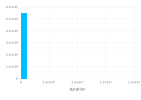

In [21]:
plot(finalData, x=:duration, Geom.histogram(bincount=20))

In [22]:
describe(finalData)

,variable,mean,min,median,max,nunique,nmissing,eltype
1,id,3.12917e5,8,3.15384e5,623517,,0,Int64
2,duration,25.8414,0.0,11.45,1.99908e5,,,Float64
3,start_date,,2011-07-28T10:12:00.04,,2012-10-01T20:32:00.04,235071,0,DateTime
4,start_station,37.7194,3,38.0,98,,0,Int64
5,end_date,,2011-07-28T10:12:00.04,,2012-10-01T20:36:00.04,230702,0,DateTime
6,end_station,37.6761,3,38.0,98,,0,Int64
7,bike_nr,,,,,884,0,CategoricalArrays.CategoricalString{UInt32}
8,subscription_type,,,,,2,0,CategoricalArrays.CategoricalString{UInt32}
9,zip_code,,,,,380,196370,CategoricalArrays.CategoricalString{UInt32}
10,birth_date,1976.29,1932,1979.0,1995,,199090,Int64


¿Que pasó?  Hay outliers en los datos... Limitemonos entonces a aquellos datos con duraciones menores a 1 dia.

In [23]:
nrow(finalData[finalData[:duration].< 24*60,:])

551611

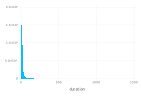

In [24]:
plot(finalData[finalData[:duration].< 24*60,:],x=:duration, Geom.histogram(bincount=200))

Mas razonable. Actualicemos los datos solo a aquellos viajes que duran menos de 24 horas.

In [25]:
finalData = finalData[finalData[:duration] .< 24*60,:]

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender
1,8,0.15,2011-07-28T10:12:00.04,23,2011-07-28T10:12:00.04,23,B00468,Registered,97217,1976,Male
2,9,3.66667,2011-07-28T10:21:00.04,23,2011-07-28T10:25:00.04,23,B00554,Registered,02215,1966,Male
3,10,0.933333,2011-07-28T10:33:00.04,23,2011-07-28T10:34:00.04,23,B00456,Registered,02108,1943,Male
4,11,1.06667,2011-07-28T10:35:00.04,23,2011-07-28T10:36:00.04,23,B00554,Registered,02116,1981,Female
5,12,0.2,2011-07-28T10:37:00.04,23,2011-07-28T10:37:00.04,23,B00554,Registered,97214,1983,Female
6,13,0.316667,2011-07-28T10:39:00.04,23,2011-07-28T10:39:00.04,23,B00456,Registered,02021,1951,Male
7,14,0.4,2011-07-28T10:47:00.04,23,2011-07-28T10:47:00.04,23,B00554,Registered,02140,1971,Female
8,15,0.116667,2011-07-28T10:48:00.04,23,2011-07-28T10:48:00.04,23,B00554,Registered,02140,1971,Female
9,16,0.133333,2011-07-28T11:01:00.04,23,2011-07-28T11:01:00.04,23,B00554,Registered,97214,1983,Female
10,17,18.4667,2011-07-28T11:55:00.04,47,2011-07-28T12:13:00.04,40,B00550,Registered,01867,1994,Male


In [26]:
nrow(finalData)

551611

Usemos las fechas. Estas pertenecen al tipo `DateTime`, por lo que podemos hacerles preguntas a ese registro, como el día de la semana de cada fecha, o el mes, etc.   <br>

Partamos analizando las fechas en que se realizan los viajes, y los dias de semana que corresponden.

In [27]:
map(df -> Dates.Date(df),finalData[:start_date])

551611-element Array{Date,1}:
 2011-07-28
 2011-07-28
 2011-07-28
 2011-07-28
 2011-07-28
 2011-07-28
 2011-07-28
 2011-07-28
 2011-07-28
 2011-07-28
 2011-07-28
 2011-07-28
 2011-07-28
 ⋮         
 2012-10-01
 2012-10-01
 2012-10-01
 2012-10-01
 2012-10-01
 2012-10-01
 2012-10-01
 2012-10-01
 2012-10-01
 2012-10-01
 2012-10-01
 2012-10-01

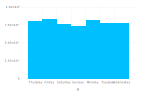

In [69]:
plot(x=map(df -> Dates.dayname(df),finalData[:start_date]), Geom.histogram)

Tambien podemos agregar una columna a la tabla. Por ejemplo, agreguemos el mes de cada viaje

In [29]:
finalData[:start_month] = map(df -> Dates.monthname(df),finalData[:start_date])

551611-element Array{String,1}:
 "July"   
 "July"   
 "July"   
 "July"   
 "July"   
 "July"   
 "July"   
 "July"   
 "July"   
 "July"   
 "July"   
 "July"   
 "July"   
 ⋮        
 "October"
 "October"
 "October"
 "October"
 "October"
 "October"
 "October"
 "October"
 "October"
 "October"
 "October"
 "October"

# Analizando los datos. 
Ok, tenemos los datos ya limpios. Esto es generlamente muy tedioso, pero vimos que tenemos herramientas para poder hacerlo de forma un poco mas sencilla. <br>
Ahora queremos empezar a hacer algunos análisis. Para esto, utilizaremos algunas funciones propias de los `Dataframes`:

## by
`by` nos permite analizar un dataframe, bajo el paradigma Split-Apply-Combine.  Este comando usa los parametros:
```
by(DataFrame,Columna,funcion)
```
con lo cual, separa (*split*) los datos del `Dataframe` para los distintos valores de `columna`, y a cada grupo de ellos les aplica (*apply*) la función `function`, combinando (*combine*) el resultado en una tabla. 

`by` es el equivalente de utilizar la secuencia de comandos `combine(map(f, groupby(d, cols)))`

In [30]:
groupby(finalData,:start_station)

DataFrames.GroupedDataFrame  95 groups with keys: Symbol[:start_station]
First Group:
11057×12 DataFrames.SubDataFrame{Array{Int64,1}}. Omitted printing of 8 columns
│ Row   │ id     │ duration │ start_date             │ start_station │
├───────┼────────┼──────────┼────────────────────────┼───────────────┤
│ 1     │ 8      │ 0.15     │ 2011-07-28T10:12:00.04 │ 23            │
│ 2     │ 9      │ 3.66667  │ 2011-07-28T10:21:00.04 │ 23            │
│ 3     │ 10     │ 0.933333 │ 2011-07-28T10:33:00.04 │ 23            │
│ 4     │ 11     │ 1.06667  │ 2011-07-28T10:35:00.04 │ 23            │
│ 5     │ 12     │ 0.2      │ 2011-07-28T10:37:00.04 │ 23            │
│ 6     │ 13     │ 0.316667 │ 2011-07-28T10:39:00.04 │ 23            │
│ 7     │ 14     │ 0.4      │ 2011-07-28T10:47:00.04 │ 23            │
│ 8     │ 15     │ 0.116667 │ 2011-07-28T10:48:00.04 │ 23            │
│ 9     │ 16     │ 0.133333 │ 2011-07-28T11:01:00.04 │ 23            │
│ 10    │ 87     │ 0.25     │ 2011-07-28T12:32:00.04 

In [31]:
map(df -> nrow(df),groupby(finalData,:start_station))

DataFrames.GroupApplied{DataFrames.DataFrame}(DataFrames.GroupedDataFrame  95 groups with keys: Symbol[:start_station]
First Group:
11057×12 DataFrames.SubDataFrame{Array{Int64,1}}. Omitted printing of 8 columns
│ Row   │ id     │ duration │ start_date             │ start_station │
├───────┼────────┼──────────┼────────────────────────┼───────────────┤
│ 1     │ 8      │ 0.15     │ 2011-07-28T10:12:00.04 │ 23            │
│ 2     │ 9      │ 3.66667  │ 2011-07-28T10:21:00.04 │ 23            │
│ 3     │ 10     │ 0.933333 │ 2011-07-28T10:33:00.04 │ 23            │
│ 4     │ 11     │ 1.06667  │ 2011-07-28T10:35:00.04 │ 23            │
│ 5     │ 12     │ 0.2      │ 2011-07-28T10:37:00.04 │ 23            │
│ 6     │ 13     │ 0.316667 │ 2011-07-28T10:39:00.04 │ 23            │
│ 7     │ 14     │ 0.4      │ 2011-07-28T10:47:00.04 │ 23            │
│ 8     │ 15     │ 0.116667 │ 2011-07-28T10:48:00.04 │ 23            │
│ 9     │ 16     │ 0.133333 │ 2011-07-28T11:01:00.04 │ 23            │
│ 10   

In [32]:
combine(map(df -> nrow(df),groupby(finalData,:start_station)))

,start_station,x1
1,23,11057
2,47,11601
3,40,12283
4,22,26537
5,38,21333
6,16,14446
7,36,21316
8,45,9199
9,5,4902
10,46,10719


In [33]:
by(finalData,:start_station,x -> mean(x[:duration]))

,start_station,x1
1,23,22.2043
2,47,23.6302
3,40,20.5656
4,22,16.7111
5,38,20.1952
6,16,17.8405
7,36,28.2959
8,45,20.5479
9,5,17.805
10,46,22.472


Por ejemplo, podemos querer contar cuantos suscriptores de cada tipo hay. PAra esto, agrupamos los datos por el tipo de suscripción, y cada grupo de ellos los contamos. Es decir:

In [34]:
by(finalData,:subscription_type,nrow)

,subscription_type,x1
1,Registered,355567
2,Casual,196044


También podemos aplicar un `by` a un conjiunto de columnas

In [35]:
by(finalData,[:start_station,:end_station],nrow)

,start_station,end_station,x1
1,23,23,661
2,47,40,301
3,40,47,334
4,22,22,1005
5,40,23,331
6,22,45,131
7,38,36,454
8,38,44,692
9,22,44,475
10,38,10,176


**Pregunta**: ¿Cuál es la duración promedio de los viajes para cada tipo de suscriptor?

In [36]:
by(finalData,:subscription_type,x -> mean(x[:duration]))

,subscription_type,x1
1,Registered,11.7226
2,Casual,39.5606


**PREGUNTA 1**: ¿Cual es la duración promedio por género?

In [37]:
by(finalData,:gender,x -> mean(x[:duration]))

,gender,x1
1,Male,11.1434
2,Female,13.4777
3,missing,39.5606


**PREGUNTA 2**: ¿Cual es la suma de las duraciones por género?

In [38]:
by(finalData,:gender,x -> sum(x[:duration]))

,gender,x1
1,Male,2.97908e6
2,Female,1.18909e6
3,missing,7.75561e6


**PREGUNTA 3**: ¿Cuál es la duración promedio para cada día de la semana? (usemos la fecha de inicio del viaje)

In [39]:
finalData[:dia_semana]= map(x -> Dates.dayname(x), finalData[:start_date])

551611-element Array{String,1}:
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 ⋮         
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  

In [40]:
by(finalData,:dia_semana,x -> mean(x[:duration]))

,dia_semana,x1
1,Thursday,16.691
2,Friday,19.3794
3,Saturday,30.7781
4,Sunday,31.3857
5,Monday,19.3645
6,Tuesday,17.1748
7,Wednesday,17.5262


**PREGUNTA 4**: ¿Cuál es la duración promedio para cada mes del año? (usemos la fecha de término del viaje)

In [41]:
finalData[:endMonth] = map(x -> Dates.monthname(x),finalData[:end_date]);
by(finalData, :endMonth, df -> mean(df[:duration]))

,endMonth,x1
1,July,20.1348
2,August,24.6973
3,September,21.8335
4,October,28.3662
5,November,21.3985
6,December,16.875
7,March,20.5453
8,April,18.4937
9,May,18.6119
10,June,17.3581


**Pregunta BONUS**: ¿Cuál es la proporción de usuarios `Casual` para cada estación de inicio? Cuales son las estaciones con mayor y menor proporción de usuarios casuales?

In [42]:
by(finalData,:start_station,df -> length(df[df[:subscription_type] .== "Casual",:subscription_type])/length(df[:subscription_type]))

,start_station,x1
1,23,0.359049
2,47,0.423239
3,40,0.317186
4,22,0.207936
5,38,0.260442
6,16,0.207462
7,36,0.454963
8,45,0.360583
9,5,0.353937
10,46,0.366172


In [43]:
sort(finalData, :duration, rev=true)

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,start_month,dia_semana,endMonth
1,77139,1439.55,2011-09-23T11:06:00.04,46,2011-09-24T11:06:00.04,15,B00437,Casual,missing,missing,missing,September,Friday,September
2,122109,1439.22,2011-10-23T09:33:00.04,40,2011-10-24T09:32:00.04,40,B00121,Casual,missing,missing,missing,October,Sunday,October
3,119272,1439.0,2011-10-21T14:53:00.04,15,2011-10-22T14:52:00.04,15,B00325,Casual,missing,missing,missing,October,Friday,October
4,122110,1438.83,2011-10-23T09:33:00.04,40,2011-10-24T09:32:00.04,40,B00561,Casual,missing,missing,missing,October,Sunday,October
5,47175,1438.75,2011-09-03T09:06:00.04,22,2011-09-04T09:04:00.04,22,B00193,Casual,missing,missing,missing,September,Saturday,September
6,119274,1438.52,2011-10-21T14:53:00.04,15,2011-10-22T14:51:00.04,15,B00459,Casual,missing,missing,missing,October,Friday,October
7,15097,1437.0,2011-08-11T15:18:00.04,16,2011-08-12T15:15:00.04,22,B00501,Casual,missing,missing,missing,August,Thursday,August
8,66212,1436.82,2011-09-16T09:17:00.04,21,2011-09-17T09:14:00.04,9,B00312,Casual,missing,missing,missing,September,Friday,September
9,324904,1436.82,2012-06-18T18:02:00.04,8,2012-06-19T17:59:00.04,8,B00173,Casual,missing,missing,missing,June,Monday,June
10,6789,1436.63,2011-08-04T22:25:00.04,49,2011-08-05T22:21:00.04,52,B00369,Casual,missing,missing,missing,August,Thursday,August


In [44]:
sort(by(finalData,:start_station,df -> length(df[df[:subscription_type] .== "Casual",:subscription_type])/length(df[:subscription_type])),:x1,rev=true)

,start_station,x1
1,92,0.721519
2,97,0.710623
3,74,0.674553
4,65,0.669708
5,93,0.6
6,71,0.596591
7,98,0.594796
8,15,0.583572
9,73,0.581597
10,94,0.571984


Supongamos ahora que queremos rescatar los dos días mas utilizados, por cada tipo de usuario, o por estación. Esto requeriría crea una propia función, que nos entregue los dos dias. Pero esto sabemos hacerlo!


In [45]:
finalData[:startDay]=map(x -> Dates.dayname(x),finalData[:start_date])

551611-element Array{String,1}:
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 "Thursday"
 ⋮         
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  
 "Monday"  

In [46]:
sort(by(finalData, :startDay, nrow),:x1, rev=true)[1:2,:startDay]

2-element Array{String,1}:
 "Friday"
 "Monday"

In [47]:
sort(by(finalData,:startDay,nrow),:x1,rev=true)[1:2,:startDay]

2-element Array{String,1}:
 "Friday"
 "Monday"

In [48]:
function best2days(df)
    tmp = sort(by(df,:startDay,nrow),:x1,rev=true)
    return tmp[1,:startDay] * " " * tmp[2,:startDay]
end

best2days (generic function with 1 method)

In [49]:
best2days(finalData)

"Friday Monday"

In [50]:
by(finalData,:subscription_type,df -> best2days(df))

,subscription_type,x1
1,Registered,Thursday Tuesday
2,Casual,Saturday Sunday


**Ejercicio**: La empresa tiene una tarifa distinta para aquellos viajes que duran mas de media hora.   Por eso, Calcule la proporción de viajes desde cada estación de inicio (*start_station*) que duran mas de 30 minutos. 

In [51]:
prop_mas_30min(duracion) = mean(duracion .>=30)

prop_mas_30min (generic function with 1 method)

In [52]:
by(finalData,:start_station,df -> prop_mas_30min(df[:duration]))

,start_station,x1
1,23,0.120376
2,47,0.14947
3,40,0.12733
4,22,0.0622904
5,38,0.0995172
6,16,0.0769071
7,36,0.170811
8,45,0.0978367
9,5,0.0993472
10,46,0.125385


**Ejercicio (BONUS):** encuentre el tipo de suscripción más común para cada estación de partida.   

In [53]:
function masComun(df)
    numRegistered = nrow(df[df[:subscription_type] .== "Registered",:])
    numCasual = nrow(df[df[:subscription_type] .== "Casual",:])
    if (numRegistered > numCasual)
        return "Registered"
    elseif (numRegistered < numCasual)
        return "Casual"
    else
        return "empate"
    end
end

masComun (generic function with 1 method)

In [54]:
newDF= by(finalData,:start_station, masComun)

,start_station,x1
1,23,Registered
2,47,Registered
3,40,Registered
4,22,Registered
5,38,Registered
6,16,Registered
7,36,Registered
8,45,Registered
9,5,Registered
10,46,Registered


In [55]:
describe(newDF)

,variable,mean,min,median,max,nunique,nmissing,eltype
1,start_station,50.7368,3,51.0,98,,0,Int64
2,x1,,Casual,,Registered,2,,String


**Ejercicio**: Cree un nuevo `DataFrame` de bicicletas, donde cada fila tenga:
- El id de cada bicicleta `bike_nr`
- la duración promedio de cada bicicleta
- la desviación estándar de las duraciones de cada bicicleta
- el número de viajes realizados en cada bicicleta

Para esto, podemos hacer que el resultado de la función a aplicar sobre cada grupo sea un `Dataframe`, por lo que al combinarlo tendremos el dataframe pedido.   Para definir un DataFrame usamos el comando `DataFrame`:
```
DataFrame(numeroFilas = nrow(finalData), duracion_promedio = mean(finalData[:duration]))
```

In [56]:
by(finalData, :bike_nr, x -> DataFrame(duracionPromedio = mean(x[:duration])))

,bike_nr,duracionPromedio
1,B00468,23.1409
2,B00554,25.7189
3,B00456,20.5206
4,B00550,22.5296
5,B00580,21.2631
6,B00539,20.2196
7,B00368,18.1836
8,B00442,22.2775
9,B00556,20.2491
10,B00316,24.8214


In [57]:
by(finalData,:bike_nr, df -> DataFrame(mean_duration = mean(df[:duration]), sd_duration = std(df[:duration]), num_trips=length(df[:duration])))

,bike_nr,mean_duration,sd_duration,num_trips
1,B00468,23.1409,60.1173,860
2,B00554,25.7189,85.7945,741
3,B00456,20.5206,41.3686,774
4,B00550,22.5296,40.2106,863
5,B00580,21.2631,47.28,966
6,B00539,20.2196,27.158,888
7,B00368,18.1836,33.4526,715
8,B00442,22.2775,66.2319,927
9,B00556,20.2491,32.2986,754
10,B00316,24.8214,83.5289,844


**Ejercicio (BONUS)**: Incluya las siguientes variables para cada fila:
- número de viajes que parten y terminan en un día diferente
- estación mas común de inicio de un viaje 
- estación mas común de término de un viaje

In [70]:
numViajesDif(data) = sum(map(df -> Dates.Date(df), data[:start_date]) .!= map(df -> Dates.Date(df), data[:end_date]))
comunStart(df) = sort(by(df,:start_station,nrow),:x1,rev=true)[1,:start_station]
comunEnd(df) = sort(by(df,:end_station,nrow),:x1,rev=true)[1,:end_station]

comunEnd (generic function with 1 method)

In [71]:
bikesData = by(finalData,:bike_nr, df -> DataFrame(mean_duration = mean(df[:duration]), sd_duration = std(df[:duration]), num_trips=length(df[:duration]), day_different = numViajesDif(df), comunStart = comunStart(df), comunEnd = comunEnd(df)))

,bike_nr,mean_duration,sd_duration,num_trips,day_different,comunStart,comunEnd
1,B00468,23.1409,60.1173,860,4,22,22
2,B00554,25.7189,85.7945,741,9,22,22
3,B00456,20.5206,41.3686,774,3,22,22
4,B00550,22.5296,40.2106,863,5,22,22
5,B00580,21.2631,47.28,966,6,36,36
6,B00539,20.2196,27.158,888,1,36,36
7,B00368,18.1836,33.4526,715,4,22,22
8,B00442,22.2775,66.2319,927,6,22,22
9,B00556,20.2491,32.2986,754,9,38,36
10,B00316,24.8214,83.5289,844,6,38,22


# Agrupando datos de diferentes tablas

Podemos unir datos de distintas tablas, que nos permitan usar información de ellas. Por ejemplo, si quisieramos aproximar la distancia de cada viaje, podríamos usar la latitud y longitud de las estaciones de inicio.  Esto requeriría "unir" (`join`) ambas tablas, en una sola, agregando a la tabla de viajes los datos de la estación de inicio.  Para esto, usamos el comando `join`.

In [59]:
merged = join(finalData,dataStations, on = (:start_station,:id))

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,start_month,dia_semana,endMonth,startDay,name,lat,lng
1,8,0.15,2011-07-28T10:12:00.04,23,2011-07-28T10:12:00.04,23,B00468,Registered,97217,1976,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
2,9,3.66667,2011-07-28T10:21:00.04,23,2011-07-28T10:25:00.04,23,B00554,Registered,02215,1966,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
3,10,0.933333,2011-07-28T10:33:00.04,23,2011-07-28T10:34:00.04,23,B00456,Registered,02108,1943,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
4,11,1.06667,2011-07-28T10:35:00.04,23,2011-07-28T10:36:00.04,23,B00554,Registered,02116,1981,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
5,12,0.2,2011-07-28T10:37:00.04,23,2011-07-28T10:37:00.04,23,B00554,Registered,97214,1983,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
6,13,0.316667,2011-07-28T10:39:00.04,23,2011-07-28T10:39:00.04,23,B00456,Registered,02021,1951,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
7,14,0.4,2011-07-28T10:47:00.04,23,2011-07-28T10:47:00.04,23,B00554,Registered,02140,1971,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
8,15,0.116667,2011-07-28T10:48:00.04,23,2011-07-28T10:48:00.04,23,B00554,Registered,02140,1971,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
9,16,0.133333,2011-07-28T11:01:00.04,23,2011-07-28T11:01:00.04,23,B00554,Registered,97214,1983,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
10,17,18.4667,2011-07-28T11:55:00.04,47,2011-07-28T12:13:00.04,40,B00550,Registered,01867,1994,Male,July,Thursday,July,Thursday,Cross St. at Hanover St.,42.3628,-71.0561


In [60]:
merged = join(merged,dataStations, on = (:end_station,:id))

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,start_month,dia_semana,endMonth,startDay,name,lat,lng,name_1,lat_1,lng_1
1,8,0.15,2011-07-28T10:12:00.04,23,2011-07-28T10:12:00.04,23,B00468,Registered,97217,1976,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
2,9,3.66667,2011-07-28T10:21:00.04,23,2011-07-28T10:25:00.04,23,B00554,Registered,02215,1966,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
3,10,0.933333,2011-07-28T10:33:00.04,23,2011-07-28T10:34:00.04,23,B00456,Registered,02108,1943,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
4,11,1.06667,2011-07-28T10:35:00.04,23,2011-07-28T10:36:00.04,23,B00554,Registered,02116,1981,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
5,12,0.2,2011-07-28T10:37:00.04,23,2011-07-28T10:37:00.04,23,B00554,Registered,97214,1983,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
6,13,0.316667,2011-07-28T10:39:00.04,23,2011-07-28T10:39:00.04,23,B00456,Registered,02021,1951,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
7,14,0.4,2011-07-28T10:47:00.04,23,2011-07-28T10:47:00.04,23,B00554,Registered,02140,1971,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
8,15,0.116667,2011-07-28T10:48:00.04,23,2011-07-28T10:48:00.04,23,B00554,Registered,02140,1971,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
9,16,0.133333,2011-07-28T11:01:00.04,23,2011-07-28T11:01:00.04,23,B00554,Registered,97214,1983,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594
10,17,18.4667,2011-07-28T11:55:00.04,47,2011-07-28T12:13:00.04,40,B00550,Registered,01867,1994,Male,July,Thursday,July,Thursday,Cross St. at Hanover St.,42.3628,-71.0561,Lewis Wharf - Atlantic Ave.,42.3639,-71.0509


Para calcular la distancia entre dos puntos geo-referenciados, usaremos el paquete `Geodesy` que permite hacer esto:

In [61]:
using Geodesy

In [62]:
merged[:geo_dist] = map((lat1,lon1,lat2,lon2) -> distance(LLA(lat1,lon1,0.0),LLA(lat2,lon2,0))/1000.0, merged[:lat],merged[:lng],merged[:lat_1],merged[:lng_1])

551611-element Array{Float64,1}:
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.443458
 0.443458
 0.443458
 0.443458
 ⋮       
 2.31795 
 2.10703 
 1.74353 
 1.04661 
 0.273783
 1.49273 
 1.38971 
 1.69128 
 0.653412
 2.37891 
 1.16925 
 0.588196

In [63]:
merged

,id,duration,start_date,start_station,end_date,end_station,bike_nr,subscription_type,zip_code,birth_date,gender,start_month,dia_semana,endMonth,startDay,name,lat,lng,name_1,lat_1,lng_1,geo_dist
1,8,0.15,2011-07-28T10:12:00.04,23,2011-07-28T10:12:00.04,23,B00468,Registered,97217,1976,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,0.0
2,9,3.66667,2011-07-28T10:21:00.04,23,2011-07-28T10:25:00.04,23,B00554,Registered,02215,1966,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,0.0
3,10,0.933333,2011-07-28T10:33:00.04,23,2011-07-28T10:34:00.04,23,B00456,Registered,02108,1943,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,0.0
4,11,1.06667,2011-07-28T10:35:00.04,23,2011-07-28T10:36:00.04,23,B00554,Registered,02116,1981,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,0.0
5,12,0.2,2011-07-28T10:37:00.04,23,2011-07-28T10:37:00.04,23,B00554,Registered,97214,1983,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,0.0
6,13,0.316667,2011-07-28T10:39:00.04,23,2011-07-28T10:39:00.04,23,B00456,Registered,02021,1951,Male,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,0.0
7,14,0.4,2011-07-28T10:47:00.04,23,2011-07-28T10:47:00.04,23,B00554,Registered,02140,1971,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,0.0
8,15,0.116667,2011-07-28T10:48:00.04,23,2011-07-28T10:48:00.04,23,B00554,Registered,02140,1971,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,0.0
9,16,0.133333,2011-07-28T11:01:00.04,23,2011-07-28T11:01:00.04,23,B00554,Registered,97214,1983,Female,July,Thursday,July,Thursday,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,Mayor Thomas M. Menino - Government Center,42.3597,-71.0594,0.0
10,17,18.4667,2011-07-28T11:55:00.04,47,2011-07-28T12:13:00.04,40,B00550,Registered,01867,1994,Male,July,Thursday,July,Thursday,Cross St. at Hanover St.,42.3628,-71.0561,Lewis Wharf - Atlantic Ave.,42.3639,-71.0509,0.443458


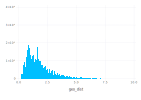

In [64]:
plot(merged, x=:geo_dist, Geom.histogram)

# Ejercicio Final:
Hubway cobra basado en la duración del viaje. Usuarios *Casual* pagan `$0` si el viaje dura menos de 30 minutos, `$2` si dura entre 30 y 60 minutos, y `$6` para viajes entre 60 a 90 minutos Por cada 30 minutos adicioanles, se cobran `$8` adicionales, con un máximo de `$100`.   Un usuario *Registered* para el 75\% de la tarifa solamente (con un máximo de `$75`, por lo tanto). 

**Ejercicio**: Agregue una columna fee que indique cuanto se cobró en cada viaje.

In [65]:
function fee(subscription_type,duration)
    if (subscription_type == "Registered")
        multiplier = 0.75
    else
        multiplier = 1
    end
    if (duration < 30)
        return (0*multiplier)
    elseif (duration < 60)
        return (2*multiplier)    
    elseif (duration < 90)
        return (6*multiplier)
    else
        return(min(100,6 + 8*(floor((duration-90)/30)+1))*multiplier)
    end
end

fee (generic function with 1 method)

In [66]:
finalData[:fee] = map((x,y) -> fee(x,y),finalData[:subscription_type],finalData[:duration])

551611-element Array{Real,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0  
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0  
 0.0
 0.0
 0.0
 0.0

In [67]:
by(finalData,:subscription_type,df -> sum(df[:fee]))

,subscription_type,x1
1,Registered,52732.5
2,Casual,651944.0


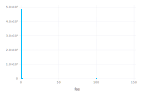

In [68]:
plot(finalData, x=:fee, Geom.histogram)